In [1]:
# Usual import
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load a test image
im = plt.imread('lecture-python//data/image_test.jpg')

In [4]:
print(type(im))

<class 'numpy.ndarray'>


In [5]:
print(im.shape)
print(im.dtype)

(3008, 4008, 3)
uint8


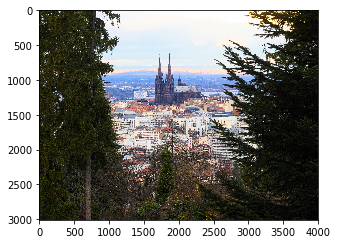

In [11]:
plt.figure(figsize=(5, 5))
plt.imshow(im);

750000


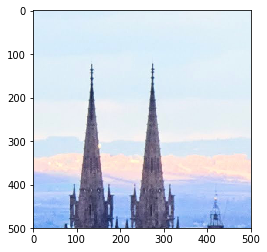

In [22]:
i0, j0 = 500, 1600
small_square = im[i0:i0+500, j0:j0+500]
print(small_square.size)
plt.imshow(small_square);

In [34]:
a = np.arange(10).reshape(5, 2)
print(a)
print(a.flatten())
print(a.ravel())
print(a.reshape(-1))

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


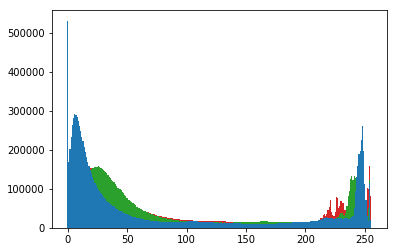

In [48]:
red = im[:, :, 0].flatten()
green = im[:, :, 1].flatten()
blue = im[:, :, 2].flatten()
plt.hist(red, bins=np.linspace(-0.5, 255.5, 257), color='tab:red');
plt.hist(green, bins=np.linspace(-0.5, 255.5, 257), color='tab:green');
plt.hist(blue, bins=np.linspace(-0.5, 255.5, 257), color='tab:blue');

In [55]:
def plot_histogram(image):
    
    # Get the 2D array for each of the three colors, and flat it.
    pixels = [p.flatten() for p in np.array_split(image, 3, axis=2)]
    
    # Produce the histogram for each color and stack them
    style_hist = {'bins': np.arange(-0.5, 256.5, 1.0), 'alpha': 0.7, 'stacked':True}
    plt.hist(pixels, color=['tab:red', 'tab:green', 'tab:blue'], **style_hist)
    
    return

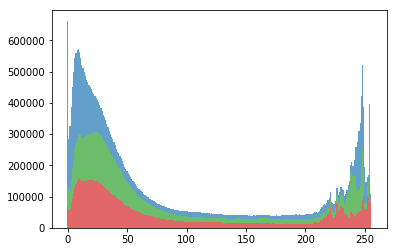

In [56]:
plot_histogram(im)

In [58]:
image = im[500:1500, 1500:3000]
print(image.shape)

(1000, 1500, 3)


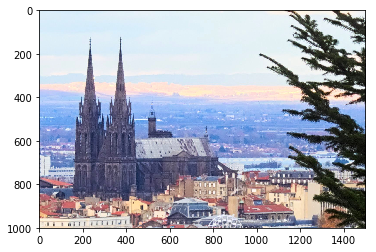

In [60]:
plt.imshow(image);

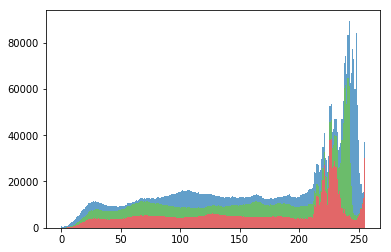

In [61]:
plot_histogram(image)

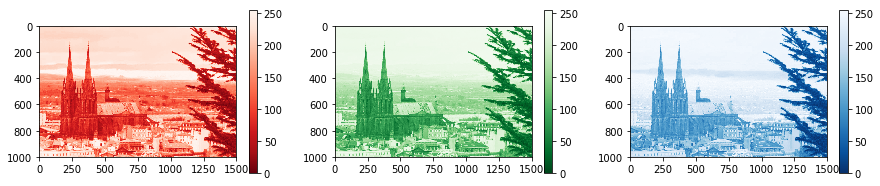

In [75]:
# Get each color channel
R, G, B = image[...,0], image[...,1], image[...,2]

fig = plt.figure(figsize=(15, 3))

# One subplot per channel (Nrow, Ncol, Nplot)
for i, (pixel, color) in enumerate(zip([R, G, B], ['Reds_r', 'Greens_r', 'Blues_r'])):
    plt.subplot(1, 3, i+1)
    plt.imshow(pixel, interpolation=None, cmap=color)
    plt.colorbar()

In [78]:
BW = 0.299*R + 0.587*G + 0.114*B
print(BW.shape)
print(BW[:5, :5])

print(R[:5, :5])

(1000, 1500)
[[234.214 234.214 234.214 234.214 232.915]
 [233.986 233.986 233.986 233.986 233.274]
 [234.986 234.986 234.986 234.986 234.274]
 [234.698 234.698 234.698 234.698 234.274]
 [233.698 233.698 233.698 232.698 234.986]]
[[220 220 220 220 218]
 [220 220 220 220 218]
 [221 221 221 221 219]
 [222 222 222 222 219]
 [221 221 221 220 221]]


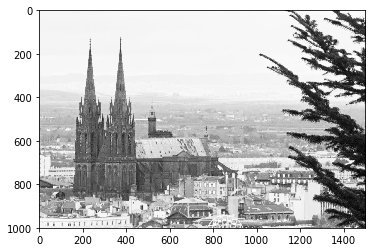

In [81]:
plt.imshow(BW, cmap='Greys_r');

In [82]:
image1 = im[500:1500, 1500:3000]
image2 = im[500:1500, 1600:3100]

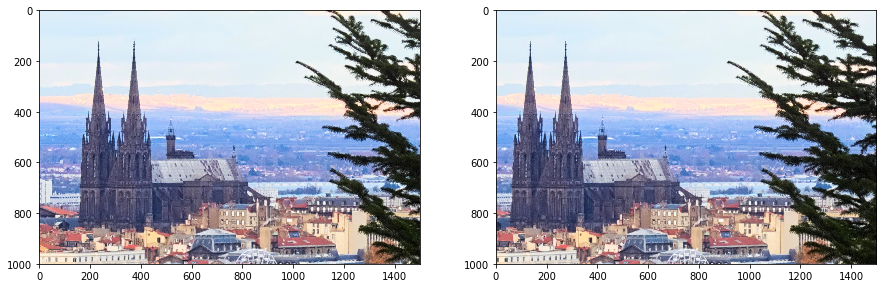

In [83]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.subplot(1, 2, 2)
plt.imshow(image2);

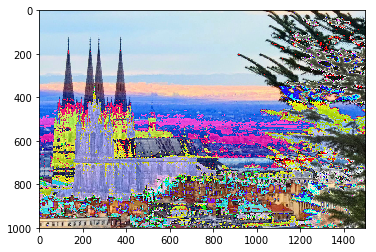

In [85]:
plt.imshow(image1+image2);

In [93]:
im_sum = image1+image2
print(image1.dtype)


uint8


In [95]:
a1 = np.array([168, 200], dtype=np.uint8)
a2 = np.array([253, 130], dtype=np.uint8)
a1+a2

array([165,  74], dtype=uint8)

In [91]:
im_sum[isBad]

array([], dtype=uint8)

In [96]:
def add_pictures(im1, im2):
    s = im1.astype(np.int) + im2.astype(np.int)
    s[s>255] = 255
    s[s<0] = 0
    return s.astype(np.uint8)

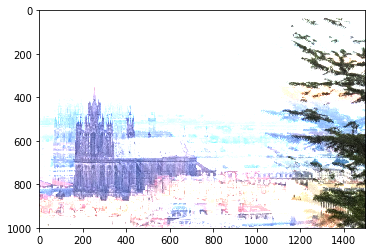

In [98]:
im_sum = add_pictures(image1, image2)
plt.imshow(im_sum)

In [99]:
def subtract_pictures(im1, im2):
    s = im1.astype(np.int) - im2.astype(np.int)
    s[s>255] = 255
    s[s<0] = 0
    return s.astype(np.uint8)

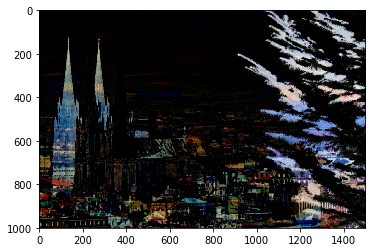

In [100]:
im_sub = subtract_pictures(image1, image2)
plt.imshow(im_sub)

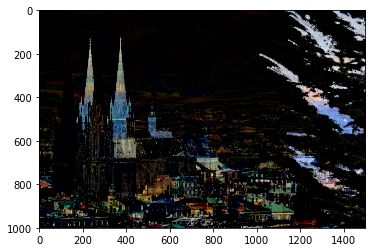

In [102]:
im_sub = subtract_pictures(image2, image1)
plt.imshow(im_sub)